In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
variaveis=[]
for i in test:
    variaveis.append(i)
variaveis.append('NU_NOTA_MT')

In [5]:
xdata=data[variaveis]

In [6]:
total = xdata.isnull().sum().sort_values(ascending=False)
percent = (xdata.isnull().sum()/xdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
TP_ENSINO,9448,0.688128
Q027,7373,0.536999
NU_NOTA_MT,3597,0.261981
NU_NOTA_COMP5,3597,0.261981
NU_NOTA_LC,3597,0.261981
TP_STATUS_REDACAO,3597,0.261981
NU_NOTA_COMP2,3597,0.261981
NU_NOTA_COMP3,3597,0.261981
NU_NOTA_COMP4,3597,0.261981


In [7]:
xdata['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

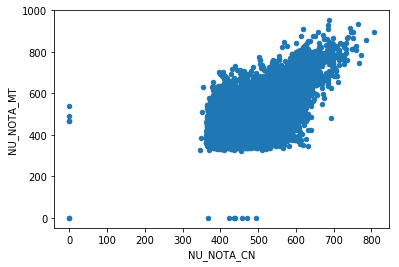

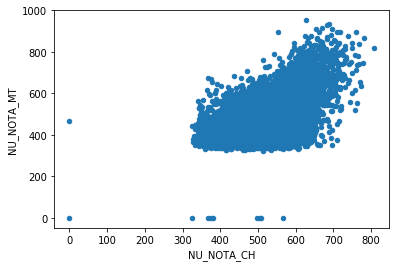

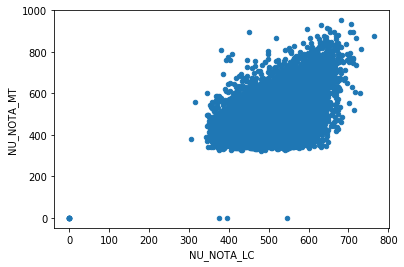

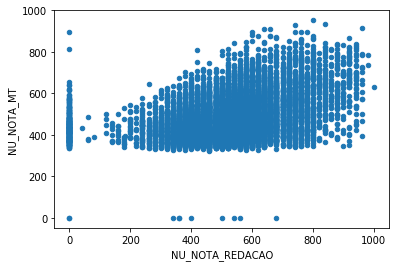

In [8]:
xdata.plot.scatter(x='NU_NOTA_CN', y='NU_NOTA_MT')
xdata.plot.scatter(x='NU_NOTA_CH', y='NU_NOTA_MT')
xdata.plot.scatter(x='NU_NOTA_LC', y='NU_NOTA_MT')
xdata.plot.scatter(x='NU_NOTA_REDACAO', y='NU_NOTA_MT')

Vendo as correlações

In [9]:
aux = xdata.copy()
aux2 = xdata.copy()

aux = aux.loc[:, xdata.columns]
aux['NU_NOTA_MT'] = aux2.NU_NOTA_MT

c = aux.corr()
c.NU_NOTA_MT.sort_values()

TP_LINGUA                -0.201726
TP_COR_RACA              -0.157364
TP_ST_CONCLUSAO          -0.087869
TP_ENSINO                -0.086353
NU_IDADE                 -0.061485
TP_STATUS_REDACAO        -0.059376
TP_NACIONALIDADE         -0.034965
IN_TREINEIRO             -0.022287
IN_SABATISTA             -0.016459
IN_SURDEZ                -0.015249
IN_IDOSO                 -0.011336
IN_GESTANTE              -0.000945
IN_BAIXA_VISAO            0.000685
IN_DISLEXIA               0.001453
TP_PRESENCA_CN            0.003552
TP_PRESENCA_CH            0.003552
IN_DISCALCULIA            0.009813
TP_ANO_CONCLUIU           0.029039
TP_ESCOLA                 0.069304
CO_UF_RESIDENCIA          0.107493
NU_NOTA_COMP1             0.299402
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP3             0.350307
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_REDACAO           0.379376
NU_NOTA_LC                0.494695
NU_NOTA_CH          

In [10]:
new_vector_training = [
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_COMP3',
    'NU_NOTA_REDACAO',
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN',
    'NU_NOTA_MT'
]

new_vector_test = [
    'NU_INSCRICAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_COMP3',
    'NU_NOTA_REDACAO',
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN'
]

In [11]:
enemTrain_data = xdata.copy()
enemTrain_data = enemTrain_data.loc[:, new_vector_training]
enemTrain_data.dropna(subset=['NU_NOTA_MT'], inplace=True)
enemTrain_data.head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_COMP3,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT
0,120.0,120.0,80.0,80.0,120.0,520.0,581.2,495.4,436.3,399.4
1,140.0,120.0,120.0,80.0,120.0,580.0,599.0,544.1,474.5,459.8
5,120.0,120.0,160.0,100.0,120.0,620.0,410.9,583.2,439.7,364.5
6,100.0,120.0,120.0,100.0,120.0,560.0,484.5,604.2,420.1,529.2
7,140.0,120.0,120.0,120.0,120.0,620.0,611.2,625.8,619.6,566.7


In [12]:
y = enemTrain_data.NU_NOTA_MT
X = enemTrain_data.drop(['NU_NOTA_MT'], axis=1)

In [13]:
enem_validation_data = test.copy()
enem_validation_data_1 = enem_validation_data.loc[:, new_vector_test]
enem_validation_data_2 = enem_validation_data.loc[:, new_vector_test]

In [14]:
enem_train_X, enem_validation_X, enem_train_y, enem_validation_y = train_test_split(X, y, random_state = 0)

In [15]:
model = XGBRegressor(n_estimators=200, learning_rate=0.1)
model.fit(enem_train_X, enem_train_y, early_stopping_rounds=5, eval_set=[(enem_validation_X, enem_validation_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [16]:
enem_validation_data_1.drop(['NU_INSCRICAO'], axis=1, inplace=True)

In [17]:
predicted_nota = model.predict(enem_validation_data_1)
result_df = pd.DataFrame({'NU_INSCRICAO': enem_validation_data_2['NU_INSCRICAO'], 'NU_NOTA_MT': predicted_nota})

In [18]:
result_df.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,422.304169
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,450.262909
2,b38a03232f43b11c9d0788abaf060f7366053b6d,576.919006
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,44.465439
4,715494628a50142ce8cb17191cfe6d0f3cae0934,547.173340


In [19]:
result_df.isnull().any().any()

False

In [20]:
result_df_final = result_df.loc[: , ['NU_INSCRICAO', 'NU_NOTA_MT']]
result_df.to_csv('answer.csv', index=False)